DenseNet, LeNet, Xception and GoogleNet models performed on
Drishti Dataset

#Importing Packages

In [1]:
#Importing packages
import os
import random
import numpy as np
import seaborn as sns
from PIL import Image
from keras.models import Model
import matplotlib.pyplot as plt
from keras.models import Sequential
from imblearn.over_sampling import SMOTE
from keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from keras.applications.xception import Xception
from keras.applications.densenet import DenseNet121
from sklearn.model_selection import train_test_split
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from sklearn.metrics import precision_score, recall_score, f1_score
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

In [2]:
# Set the dimensions of the input images
img_width, img_height = 224, 224
# Set the number of classes
num_classes = 2
# Set the path to the directory containing the images
data_path = "/content/drive/MyDrive/DS_GS1_sp"
# Load the image data and labels
X = []
y = []
for label, folder_name in enumerate(["Normal_ds", "Glaucoma_ds"]):
    folder_path = os.path.join(data_path, folder_name)
    for filename in os.listdir(folder_path):
        image = Image.open(os.path.join(folder_path, filename))
        image = image.resize((img_width, img_height))
        image = np.array(image)
        X.append(image)
        y.append(label)

# Set a fixed random seed for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)

#Image PreProcessing

In [3]:
# Convert the image data and labels to NumPy arrays
X = np.array(X)
y = np.array(y)
# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X.reshape(X.shape[0], -1), y)
# Reshape X back to 3D format
X = X.reshape(X.shape[0], img_width, img_height, 3)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Normalize the image data to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
# Convert the labels to one-hot encoding
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]
# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

#Creating Models

In [4]:
# Create the DenseNet121 model
base_dense_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(img_width, img_height, 3))
# Create the Xception model
base_xception_model = Xception(include_top=False, weights='imagenet', input_shape=(img_width, img_height, 3))
# Load the InceptionV3 model without the top classification layer
base_inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))


87910968/87910968 [==============================] - 0s 0us/step


#Adding custom classification layers

In [5]:
# Add custom classification layers on top of the base dense model
dense_model = Sequential()
dense_model.add(base_dense_model)
dense_model.add(Flatten())
dense_model.add(Dense(256, activation='relu'))
dense_model.add(Dense(num_classes, activation='softmax'))


In [6]:
# Add custom classification layers on top of the base dense model
inception_model = Sequential()
inception_model.add(base_inception_model)
inception_model.add(Flatten())
inception_model.add(Dense(256, activation='relu'))
inception_model.add(Dense(num_classes, activation='softmax'))


In [22]:
# Add custom classification layers on top of the Xception base model
xception_model = Sequential()
xception_model.add(base_xception_model)
xception_model.add(Flatten())
xception_model.add(Dense(256, activation='relu'))
xception_model.add(Dense(num_classes, activation='softmax'))


In [8]:
# Create the LeNet-5 model
lenet_model = Sequential()
lenet_model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(img_width, img_height, 3)))
lenet_model.add(AveragePooling2D(pool_size=(2, 2)))
lenet_model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
lenet_model.add(AveragePooling2D(pool_size=(2, 2)))
lenet_model.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))
lenet_model.add(AveragePooling2D(pool_size=(2, 2)))
lenet_model.add(Flatten())
lenet_model.add(Dense(120, activation='relu'))
lenet_model.add(Dense(84, activation='relu'))
lenet_model.add(Dense(num_classes, activation='softmax'))

#Compiling the models

In [23]:
# Compile the dense model
dense_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Compile the xception model
xception_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Compile the lenet model
lenet_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Compile the model
inception_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Training the models

In [31]:
# Train the model
xception_model.fit(
    datagen.flow(X_train, y_train, batch_size=32, seed = seed),
    steps_per_epoch=len(X_train) // 32,
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/10
3/3 [==============================] - 3s 1s/step - loss: 0.5268 - accuracy: 0.8250 - val_loss: 0.4322 - val_accuracy: 0.6429
Epoch 2/10
3/3 [==============================] - 2s 607ms/step - loss: 0.5604 - accuracy: 0.7500 - val_loss: 0.3808 - val_accuracy: 0.8214
Epoch 3/10
3/3 [==============================] - 2s 686ms/step - loss: 0.5195 - accuracy: 0.7750 - val_loss: 0.5034 - val_accuracy: 0.7857
Epoch 4/10
3/3 [==============================] - 2s 484ms/step - loss: 0.6113 - accuracy: 0.7875 - val_loss: 0.6597 - val_accuracy: 0.8929
Epoch 5/10
3/3 [==============================] - 2s 599ms/step - loss: 0.5608 - accuracy: 0.7500 - val_loss: 1.0302 - val_accuracy: 0.7857
Epoch 5: early stopping


In [58]:
# Train the GoogleNet model
inception_model.fit(
    datagen.flow(X_train, y_train, batch_size=32, seed = seed),
    steps_per_epoch=len(X_train) // 32,
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/10
3/3 [==============================] - 2s 630ms/step - loss: 0.4760 - accuracy: 0.7750 - val_loss: 94.3991 - val_accuracy: 0.6071
Epoch 2/10
3/3 [==============================] - 2s 752ms/step - loss: 0.4179 - accuracy: 0.8333 - val_loss: 98.6075 - val_accuracy: 0.6071
Epoch 3/10
3/3 [==============================] - 2s 790ms/step - loss: 0.4093 - accuracy: 0.8375 - val_loss: 83.0386 - val_accuracy: 0.6071
Epoch 4/10
3/3 [==============================] - 2s 523ms/step - loss: 0.4208 - accuracy: 0.8125 - val_loss: 39.6576 - val_accuracy: 0.6071
Epoch 5/10
3/3 [==============================] - 2s 614ms/step - loss: 0.2599 - accuracy: 0.8875 - val_loss: 20.5861 - val_accuracy: 0.6071
Epoch 6/10
3/3 [==============================] - 2s 618ms/step - loss: 0.4153 - accuracy: 0.8375 - val_loss: 11.0428 - val_accuracy: 0.6071
Epoch 7/10
3/3 [==============================] - 1s 447ms/step - loss: 0.2931 - accuracy: 0.8625 - val_loss: 4.8331 - val_accuracy: 0.6071
Epoch 8/10
3/3

In [80]:
# Train the DenseNet model
dense_model.fit(
    datagen.flow(X_train, y_train, batch_size=32, seed = seed),
    steps_per_epoch=len(X_train) // 32,
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/10
3/3 [==============================] - 2s 812ms/step - loss: 0.2740 - accuracy: 0.8750 - val_loss: 2.2378 - val_accuracy: 0.6071
Epoch 2/10
3/3 [==============================] - 2s 461ms/step - loss: 0.1795 - accuracy: 0.9250 - val_loss: 2.5397 - val_accuracy: 0.6071
Epoch 3/10
3/3 [==============================] - 3s 1s/step - loss: 0.1143 - accuracy: 0.9625 - val_loss: 1.4252 - val_accuracy: 0.5714
Epoch 4/10
3/3 [==============================] - 2s 549ms/step - loss: 0.2482 - accuracy: 0.9000 - val_loss: 0.6984 - val_accuracy: 0.7500
Epoch 5/10
3/3 [==============================] - 1s 411ms/step - loss: 0.1485 - accuracy: 0.9500 - val_loss: 0.7822 - val_accuracy: 0.7500
Epoch 6/10
3/3 [==============================] - 1s 556ms/step - loss: 0.0947 - accuracy: 0.9500 - val_loss: 1.0800 - val_accuracy: 0.7500
Epoch 7/10
3/3 [==============================] - 2s 543ms/step - loss: 0.1313 - accuracy: 0.9250 - val_loss: 0.6896 - val_accuracy: 0.7857
Epoch 8/10
3/3 [=======

In [14]:
# Fit the model with data augmentation
lenet_model.fit(
    datagen.flow(X_train, y_train, batch_size=32,seed = seed),
    steps_per_epoch=len(X_train) // 32,
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/10
3/3 [==============================] - 5s 498ms/step - loss: 0.8340 - accuracy: 0.4875 - val_loss: 0.6813 - val_accuracy: 0.6071
Epoch 2/10
3/3 [==============================] - 1s 296ms/step - loss: 0.6884 - accuracy: 0.4750 - val_loss: 0.6682 - val_accuracy: 0.6071
Epoch 3/10
3/3 [==============================] - 1s 377ms/step - loss: 0.6760 - accuracy: 0.4479 - val_loss: 0.6197 - val_accuracy: 0.6429
Epoch 4/10
3/3 [==============================] - 1s 310ms/step - loss: 0.6629 - accuracy: 0.5250 - val_loss: 0.5460 - val_accuracy: 0.7143
Epoch 5/10
3/3 [==============================] - 1s 313ms/step - loss: 0.6051 - accuracy: 0.7000 - val_loss: 0.5277 - val_accuracy: 0.8214
Epoch 6/10
3/3 [==============================] - 2s 672ms/step - loss: 0.6633 - accuracy: 0.5125 - val_loss: 0.5365 - val_accuracy: 0.7500
Epoch 7/10
3/3 [==============================] - 2s 516ms/step - loss: 0.5728 - accuracy: 0.7250 - val_loss: 0.5461 - val_accuracy: 0.6429
Epoch 8/10
3/3 [====

#Performance Evaluation Metrics

In [81]:
# Evaluate the model on the test data
loss, accuracy = xception_model.evaluate(X_test, y_test)
print(f"Test Loss of xception: {loss:.4f}")
print(f"Test Accuracy of xception: {accuracy:.4f}")
# Evaluate the model on the test data
loss, accuracy = dense_model.evaluate(X_test, y_test)
print(f"Test Loss of densenet: {loss:.4f}")
print(f"Test Accuracy of densenet: {accuracy:.4f}")
# Evaluate the model on the test data
loss, accuracy = inception_model.evaluate(X_test, y_test)
print(f"Test Loss of inception: {loss:.4f}")
print(f"Test Accuracy of inception: {accuracy:.4f}")
# Evaluate the model on the test data
loss, accuracy = lenet_model.evaluate(X_test, y_test)
print(f"Test Loss of lenet_model: {loss:.4f}")
print(f"Test Accuracy of lenet_model: {accuracy:.4f}")

1/1 [==============================] - 0s 187ms/step - loss: 0.3808 - accuracy: 0.8214
Test Loss of xception: 0.3808
Test Accuracy of xception: 0.8214
1/1 [==============================] - 0s 135ms/step - loss: 0.6109 - accuracy: 0.8929
Test Loss of densenet: 0.6109
Test Accuracy of densenet: 0.8929
1/1 [==============================] - 0s 114ms/step - loss: 0.7320 - accuracy: 0.8214
Test Loss of inception: 0.7320
Test Accuracy of inception: 0.8214
1/1 [==============================] - 0s 47ms/step - loss: 0.4009 - accuracy: 0.8571
Test Loss of lenet_model: 0.4009
Test Accuracy of lenet_model: 0.8571


In [82]:
# 1. Evaluate the dense model on the test data
y_pred_dense = dense_model.predict(X_test)
y_pred_dense_classes = np.argmax(y_pred_dense, axis=1)
y_true_dense = np.argmax(y_test, axis=1)
# Calculate precision, recall, and F1 score for dense
precision_dense = precision_score(y_true_dense, y_pred_dense_classes)
recall_dense = recall_score(y_true_dense, y_pred_dense_classes)
f1_dense = f1_score(y_true_dense, y_pred_dense_classes)
# 2. Evaluate the Inception model on the test data
y_pred_inception = inception_model.predict(X_test)
y_pred_inception_classes = np.argmax(y_pred_inception, axis=1)
y_true_inception = np.argmax(y_test, axis=1)
# Calculate precision, recall, and F1 score for Inception
precision_inception = precision_score(y_true_inception, y_pred_inception_classes)
recall_inception = recall_score(y_true_inception, y_pred_inception_classes)
f1_inception = f1_score(y_true_inception, y_pred_inception_classes)
# 3. Evaluate the Xception model on the test data
y_pred_xception = xception_model.predict(X_test)
y_pred_xception_classes = np.argmax(y_pred_xception, axis=1)
y_true_xception = np.argmax(y_test, axis=1)
# Calculate precision, recall, and F1 score for Xception
precision_xception = precision_score(y_true_xception, y_pred_xception_classes)
recall_xception = recall_score(y_true_xception, y_pred_xception_classes)
f1_xception = f1_score(y_true_xception, y_pred_xception_classes)
# 4. Evaluate the LeNet model on the test data
y_pred_lenet = lenet_model.predict(X_test)
y_pred_lenet_classes = np.argmax(y_pred_lenet, axis=1)
y_true_lenet = np.argmax(y_test, axis=1)
# Calculate precision, recall, and F1 score for LeNet
precision_lenet = precision_score(y_true_lenet, y_pred_lenet_classes)
recall_lenet = recall_score(y_true_lenet, y_pred_lenet_classes)
f1_lenet = f1_score(y_true_lenet, y_pred_lenet_classes)

1/1 [==============================] - 0s 31ms/step


In [83]:
#dense
print(f"Precision of dense: {precision_dense:.4f}")
print(f"Recall of dense: {recall_dense:.4f}")
print(f"F1 Score of dense: {f1_dense:.4f}")
#xception
print(f"Precision xception: {precision_xception:.4f}")
print(f"Recall xception: {recall_xception:.4f}")
print(f"F1 Score xception: {f1_xception:.4f}")
#inception
print(f"Precision inception: {precision_inception:.4f}")
print(f"Recall inception: {recall_inception:.4f}")
print(f"F1 Score inception: {f1_inception:.4f}")
#lenet
print(f"Precision lenet: {precision_lenet:.4f}")
print(f"Recall lenet: {recall_lenet:.4f}")
print(f"F1 Score lenet: {f1_lenet:.4f}")

Precision of dense: 0.9000
Recall of dense: 0.8182
F1 Score of dense: 0.8571
Precision xception: 0.8000
Recall xception: 0.7273
F1 Score xception: 0.7619
Precision inception: 0.7143
Recall inception: 0.9091
F1 Score inception: 0.8000
Precision lenet: 0.7692
Recall lenet: 0.9091
F1 Score lenet: 0.8333


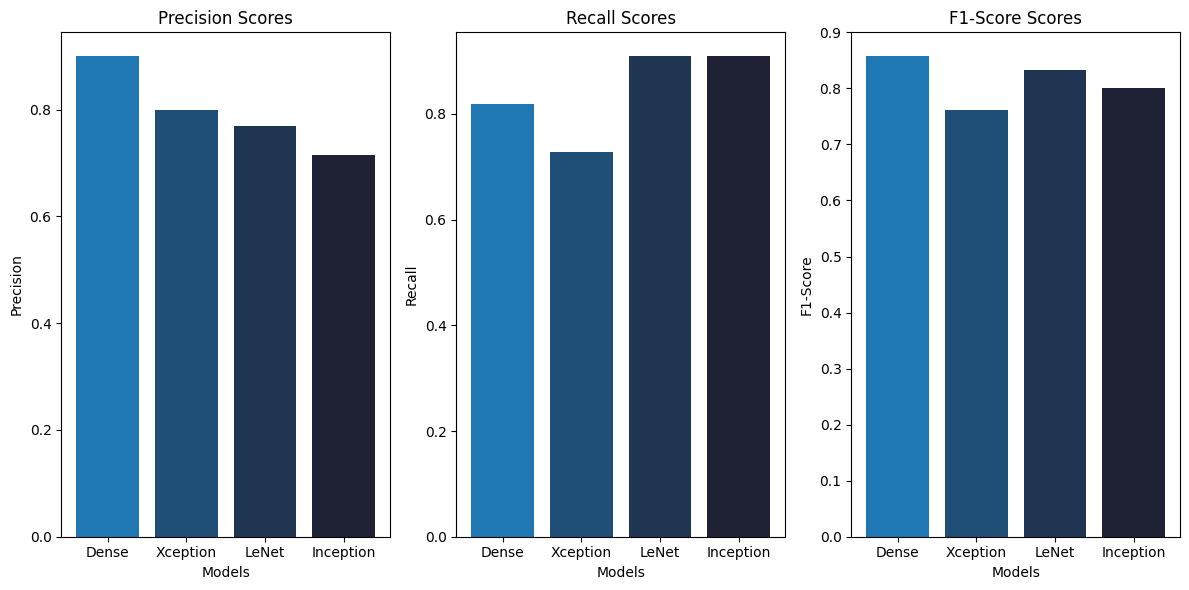

In [84]:
# Precision, Recall, and F1-score values for each model
models = ['Dense', 'Xception', 'LeNet', 'Inception']
precision_values = [precision_dense, precision_xception, precision_lenet, precision_inception]
recall_values = [recall_dense, recall_xception, recall_lenet, recall_inception]
f1_values = [f1_dense, f1_xception, f1_lenet, f1_inception]
# Define different shades of blue for each model
colors = ['#1f77b4', '#1f4e77', '#1f3552', '#1f2235']
# Initialize plots
plt.figure(figsize=(12, 6))
# Plot Precision scores
plt.subplot(1, 3, 1)
plt.bar(models, precision_values, color=colors)
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision Scores')
# Plot Recall scores
plt.subplot(1, 3, 2)
plt.bar(models, recall_values, color=colors)
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall Scores')
# Plot F1 scores
plt.subplot(1, 3, 3)
plt.bar(models, f1_values, color=colors)
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.title('F1-Score Scores')
plt.tight_layout()
plt.show()

In [85]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Obtain the predicted probabilities for the positive class of DenseNet model
y_pred_prob_dense = dense_model.predict(X_test)[:, 1]
# Obtain the predicted probabilities for the positive class of Xception Model
y_pred_prob_xception = xception_model.predict(X_test)[:, 1]
# Obtain the predicted probabilities for the positive class of LeNet model
y_pred_prob_lenet = lenet_model.predict(X_test)[:, 1]
# Obtain the predicted probabilities for the positive class of Inception Model
y_pred_prob_inception = inception_model.predict(X_test)[:, 1]

1/1 [==============================] - 0s 41ms/step


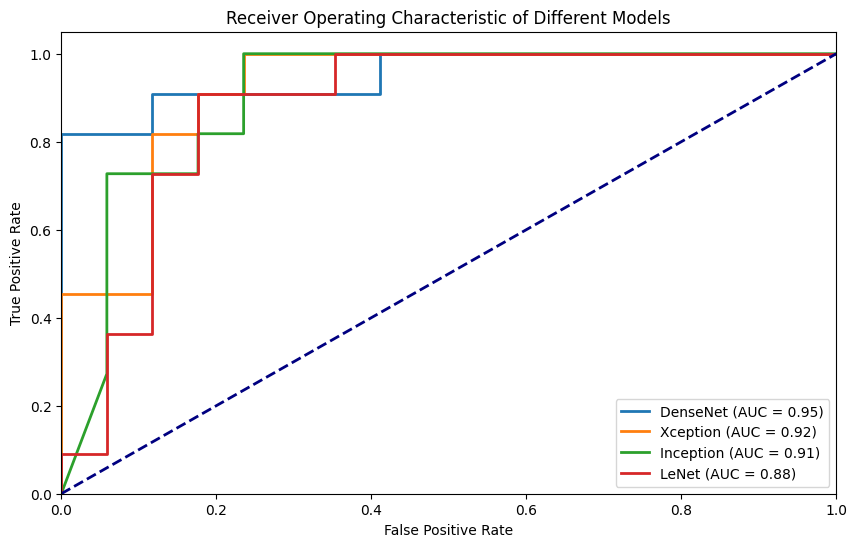

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Data for all models
models = ['DenseNet', 'Xception', 'Inception', 'LeNet']
fprs = [fpr_dense, fpr_xception, fpr_inception, fpr_lenet]
tprs = [tpr_dense, tpr_xception, tpr_inception, tpr_lenet]
auc_scores = [auc(fpr, tpr) for fpr, tpr in zip(fprs, tprs)]
# Plotting ROC curves for all models
plt.figure(figsize=(10, 6))
for model, fpr, tpr, auc_score in zip(models, fprs, tprs, auc_scores):
    plt.plot(fpr, tpr, lw=2, label=f'{model} (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Different Models')
plt.legend(loc="lower right")
plt.show()

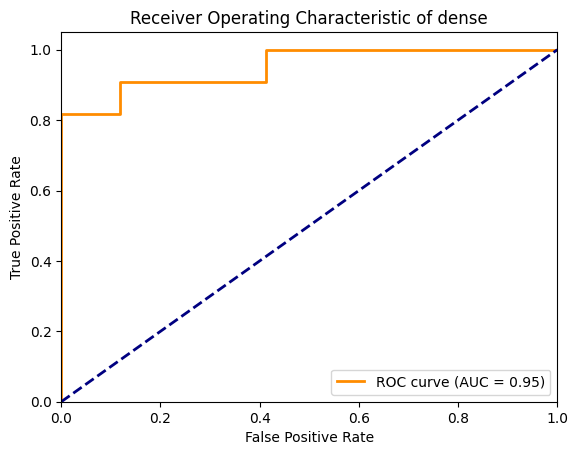

In [86]:
# Compute the false positive rate, true positive rate, and classification threshold of dense
fpr_dense, tpr_dense, thresholds_dense = roc_curve(y_true_dense, y_pred_prob_dense)
# Compute the AUC score
roc_auc = auc(fpr_dense, tpr_dense)
# Plot the ROC curve
plt.figure()
plt.plot(fpr_dense, tpr_dense, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of dense')
plt.legend(loc="lower right")
plt.show()

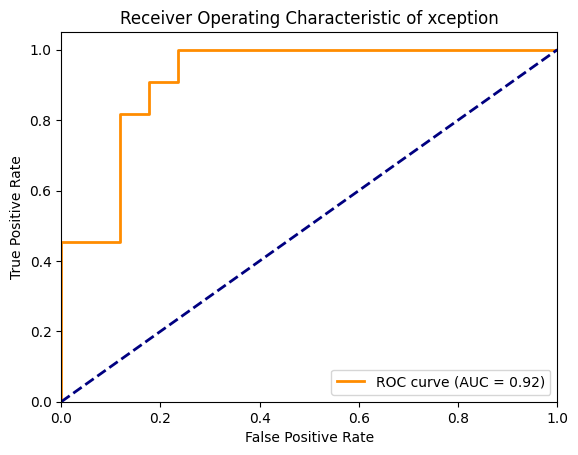

In [87]:
# Compute the false positive rate, true positive rate, and classification threshold of xception
fpr_xception, tpr_xception, thresholds_xception = roc_curve(y_true_xception, y_pred_prob_xception)
# Compute the AUC score
roc_auc = auc(fpr_xception, tpr_xception)
# Plot the ROC curve
plt.figure()
plt.plot(fpr_xception, tpr_xception, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of xception')
plt.legend(loc="lower right")
plt.show()

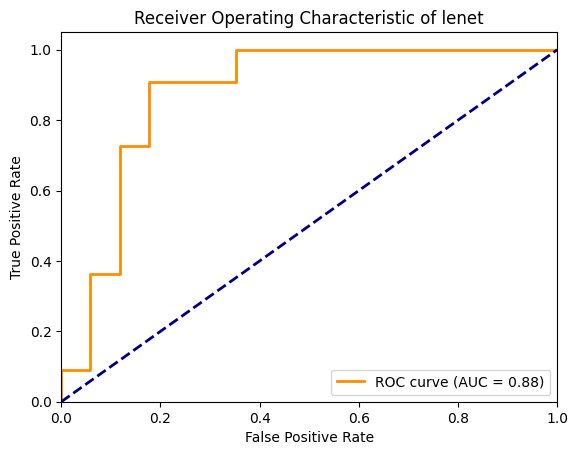

In [88]:
# Compute the false positive rate, true positive rate, and classification threshold of xception
fpr_lenet, tpr_lenet, thresholds_lenet = roc_curve(y_true_lenet, y_pred_prob_lenet)
# Compute the AUC score
roc_auc = auc(fpr_lenet, tpr_lenet)
# Plot the ROC curve
plt.figure()
plt.plot(fpr_lenet, tpr_lenet, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of lenet')
plt.legend(loc="lower right")
plt.show()

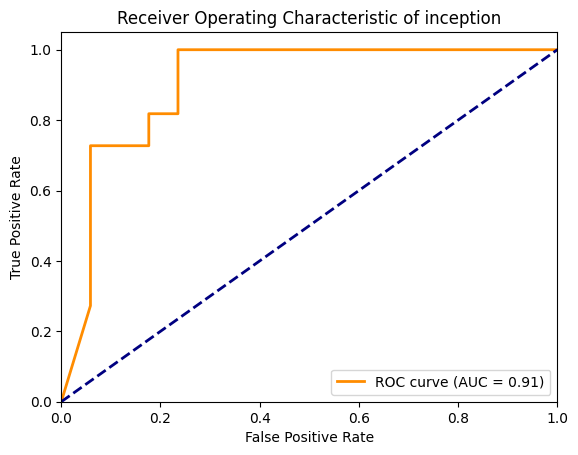

In [89]:

# Compute the false positive rate, true positive rate, and classification threshold of xception
fpr_inception, tpr_inception, thresholds_inception = roc_curve(y_true_inception, y_pred_prob_inception)
# Compute the AUC score
roc_auc = auc(fpr_inception, tpr_inception)
# Plot the ROC curve
plt.figure()
plt.plot(fpr_inception, tpr_inception, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of inception')
plt.legend(loc="lower right")
plt.show()

In [93]:
# Define the class labels
class_names = ['No', 'Yes']

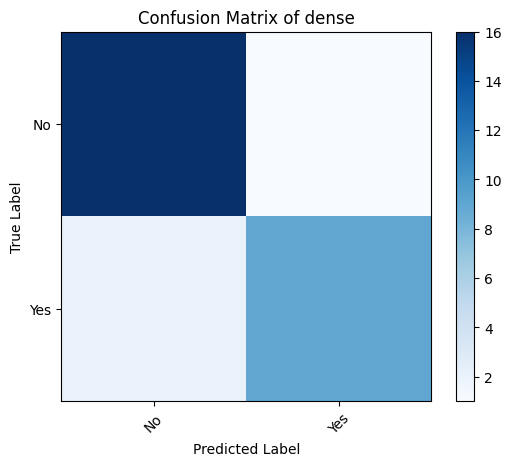

In [94]:
# Obtain the predicted classes
y_pred_classes_dense = np.argmax(y_pred_dense, axis=1)
y_true_classes_dense = np.argmax(y_test, axis=1)
# Compute the confusion matrix
cm = confusion_matrix(y_true_classes_dense, y_pred_classes_dense)
# Create a function to plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
# Plot the confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names)
plt.title('Confusion Matrix of dense')
plt.show()

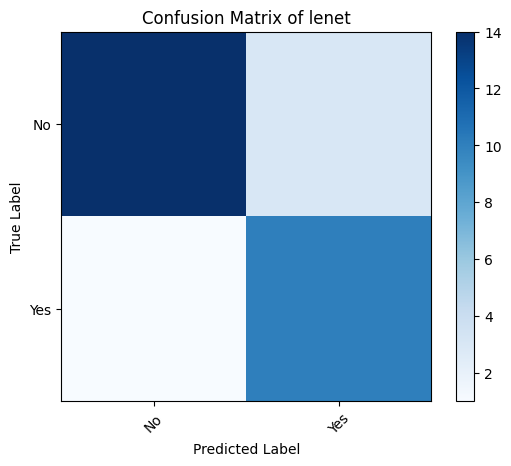

In [95]:
# Obtain the predicted classes
y_pred_classes_lenet = np.argmax(y_pred_lenet, axis=1)
y_true_classes_lenet = np.argmax(y_test, axis=1)
# Compute the confusion matrix
cm = confusion_matrix(y_true_classes_lenet, y_pred_classes_lenet)
# Create a function to plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
# Plot the confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names)
plt.title('Confusion Matrix of lenet')
plt.show()

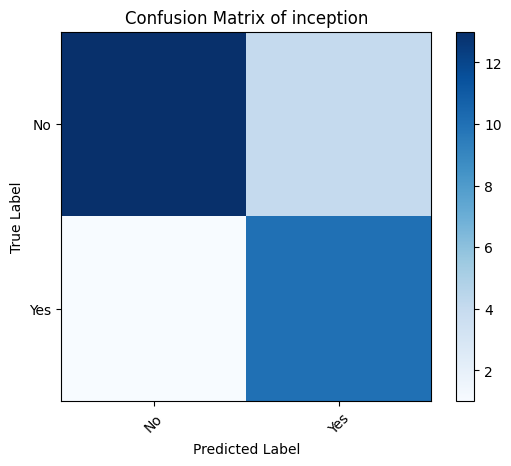

In [96]:
# Obtain the predicted classes
y_pred_classes_inception = np.argmax(y_pred_inception, axis=1)
y_true_classes_inception = np.argmax(y_test, axis=1)
# Compute the confusion matrix
cm = confusion_matrix(y_true_classes_inception, y_pred_classes_inception)
# Create a function to plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
# Plot the confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names)
plt.title('Confusion Matrix of inception')
plt.show()


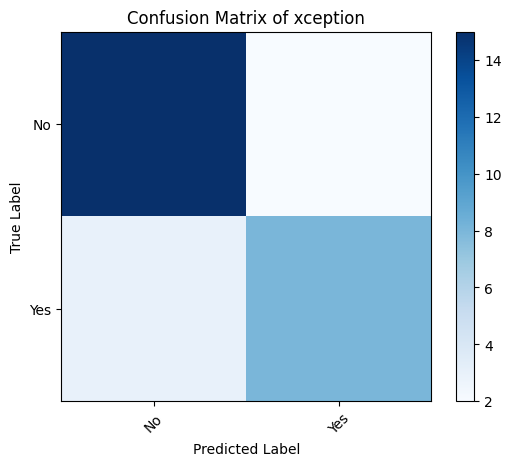

In [97]:
# Obtain the predicted classes
y_pred_classes_xception = np.argmax(y_pred_xception, axis=1)
y_true_classes_xception = np.argmax(y_test, axis=1)
# Compute the confusion matrix
cm = confusion_matrix(y_true_classes_xception, y_pred_classes_xception)
# Create a function to plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
# Plot the confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names)
plt.title('Confusion Matrix of xception')
plt.show()

In [98]:
cm_xception = confusion_matrix(y_true_classes_xception, y_pred_classes_xception)
cm_inception = confusion_matrix(y_true_classes_inception, y_pred_classes_inception)
cm_lenet = confusion_matrix(y_true_classes_lenet, y_pred_classes_lenet)
cm_dense = confusion_matrix(y_true_classes_dense, y_pred_classes_dense)

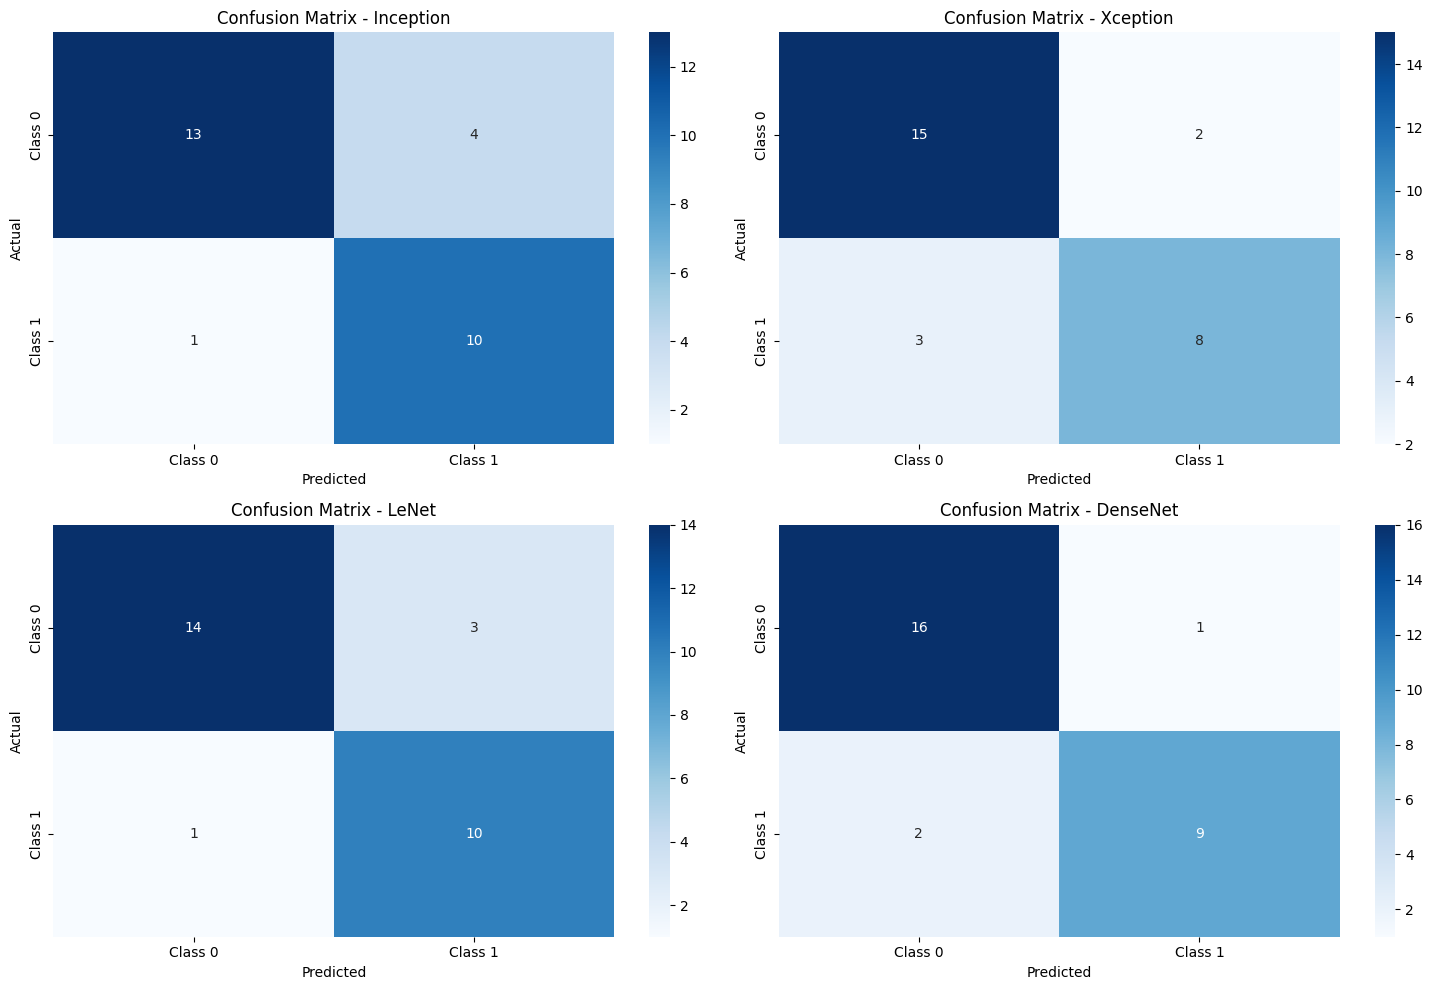

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# List of model names
model_names = ['Inception', 'Xception', 'LeNet', 'DenseNet']

# List of confusion matrices for each model
conf_matrices = [
    cm_inception,
    cm_xception,
    cm_lenet,
    cm_dense
]

# Plot confusion matrices
plt.figure(figsize=(15, 10))
for i, (model_name, conf_matrix) in enumerate(zip(model_names, conf_matrices), start=1):
    plt.subplot(2, 2, i)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()
